In [83]:
import pandas as pd
import numpy as np

import seaborn as sb
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("../data/processed/stocks-COMBINED-Jan2020-Dec2024.csv")

df.drop('Unnamed: 0', axis=1, inplace=True)
print(df.shape)
df.head()

(4872, 18)


,Date,Price,Open,High,Low,Vol.,Change %,Year,EPS,Ticker,Price_Return,Log_Return,Volatility,Moving_Average,RSI,MACD,Sharpe_Ratio,Max_Drawdown
0,2024-11-01,141.86,144.44,144.54,141.32,39030000.0,-0.0153,2024,0.7,AMD,0.008173,0.008140,0.020197,143.830,411.212815,0.728616,-0.010539,-0.000235
1,2024-10-31,144.07,147.80,148.68,143.33,44390000.0,-0.0305,2024,0.7,AMD,0.015579,0.015459,0.018745,142.680,310.200927,0.792438,-0.010539,-0.000235
2,2024-10-30,148.60,153.01,153.12,148.10,87700000.0,-0.1062,2024,0.7,AMD,0.031443,0.030959,0.019660,143.380,247.665581,1.194777,-0.010539,-0.000235
3,2024-10-29,166.25,161.10,167.51,158.94,71900000.0,0.0396,2024,0.7,AMD,0.118775,0.112235,0.032259,148.298,148.096633,2.904362,-0.010539,-0.000235
4,2024-10-28,159.92,158.50,160.28,157.04,36010000.0,0.0236,2024,0.7,AMD,-0.038075,-0.038819,0.033763,152.140,161.710631,3.705724,-0.010539,-0.000235


# Exploratory Data Analysis

- understand strucure, identify trends, detect anomalies, engineer features


## 1 Initial Data Inspection


In [41]:
print(df.info())
print(df.isna().sum())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4872 entries, 0 to 4871
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4872 non-null   datetime64[ns]
 1   Price           4872 non-null   float64       
 2   Open            4872 non-null   float64       
 3   High            4872 non-null   float64       
 4   Low             4872 non-null   float64       
 5   Vol.            4872 non-null   float64       
 6   Change %        4872 non-null   float64       
 7   Year            4872 non-null   int32         
 8   EPS             4872 non-null   float64       
 9   Ticker          4872 non-null   object        
 10  Price_Return    4872 non-null   float64       
 11  Log_Return      4872 non-null   float64       
 12  Volatility      4872 non-null   float64       
 13  Moving_Average  4872 non-null   float64       
 14  RSI             4872 non-null   float64       
 15  MACD

,Date,Price,Open,High,Low,Vol.,Change %,Year,EPS,Ticker,...,MACD,Sharpe_Ratio,Max_Drawdown,Month,Day,Day_Of_Week,Is_Weekend,Quarter,Month_sine,Month_cosine
0,2024-11-01,141.86,144.44,144.54,141.32,39030000.0,-0.0153,2024,0.7,AMD,...,0.728616,-0.010539,-0.000235,11,1,4,0,4,-0.500000,0.866025
1,2024-10-31,144.07,147.80,148.68,143.33,44390000.0,-0.0305,2024,0.7,AMD,...,0.792438,-0.010539,-0.000235,10,31,3,0,4,-0.866025,0.500000
2,2024-10-30,148.60,153.01,153.12,148.10,87700000.0,-0.1062,2024,0.7,AMD,...,1.194777,-0.010539,-0.000235,10,30,2,0,4,-0.866025,0.500000
3,2024-10-29,166.25,161.10,167.51,158.94,71900000.0,0.0396,2024,0.7,AMD,...,2.904362,-0.010539,-0.000235,10,29,1,0,4,-0.866025,0.500000
4,2024-10-28,159.92,158.50,160.28,157.04,36010000.0,0.0236,2024,0.7,AMD,...,3.705724,-0.010539,-0.000235,10,28,0,0,4,-0.866025,0.500000


## 2 Descriptive Statistics & Summary

- central tendencies & distribution for each numerical feature


In [48]:
# Extract all float64 features
float_columns = df.select_dtypes(include=['float64']).columns
df_float = df[float_columns]

In [52]:
for col in float_columns:
    print(df.groupby('Ticker')[[col]].describe())


         Price                                                              \
         count        mean        std     min       25%      50%       75%   
Ticker                                                                       
AMD     1218.0  102.634647  36.107979   38.71   78.5500   95.065  122.3025   
BOE     1218.0  196.717718  40.601856   95.01  169.9925  198.490  217.1725   
GSPC    1218.0  421.227479  71.486258  224.65  380.5525  419.255  456.7325   
TSLA    1218.0  208.247562  78.993299   24.08  172.6775  218.570  255.8525   

                
           max  
Ticker          
AMD     211.38  
BOE     347.45  
GSPC    587.46  
TSLA    409.97  
          Open                                                            \
         count        mean        std     min     25%      50%       75%   
Ticker                                                                     
AMD     1218.0  102.680394  36.224058   39.08   78.81   94.995  122.1375   
BOE     1218.0  196.938251  40

## 3 Visualize Data Distributions & Relationships


### 3.1 Uni-variate analysis


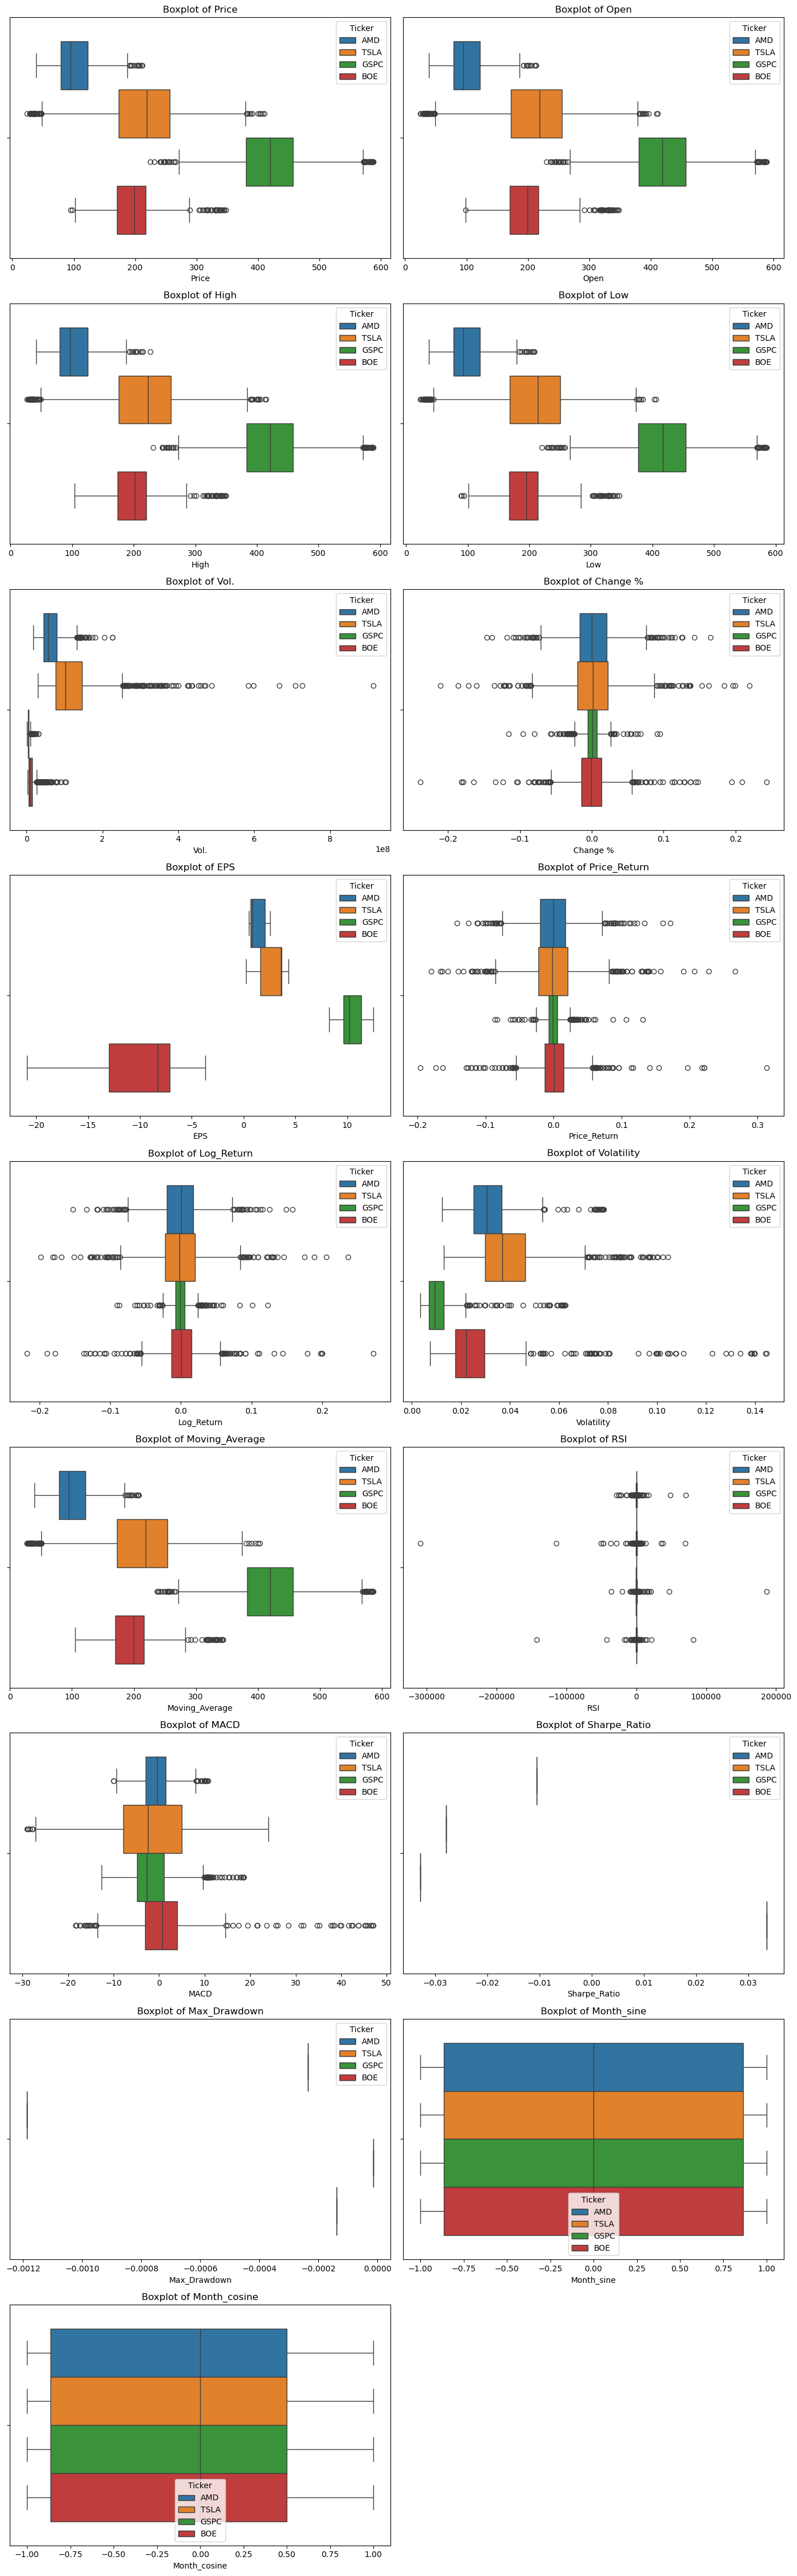

In [56]:
# Set up the figure with 3 columns
n_cols = 2
n_rows = (len(float_columns) // n_cols) + (len(float_columns) % n_cols > 0)

plt.figure(figsize=(14, n_rows * 5))

# Loop through the float columns and create boxplots
for i, column in enumerate(float_columns, start=1):
    plt.subplot(n_rows, n_cols, i)
    sb.boxplot(x=df[column], hue='Ticker', data=df)
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

### 3.2 Bi-variate analysis


Text(0.5, 1.0, 'Correlation heatmap for numerical features')

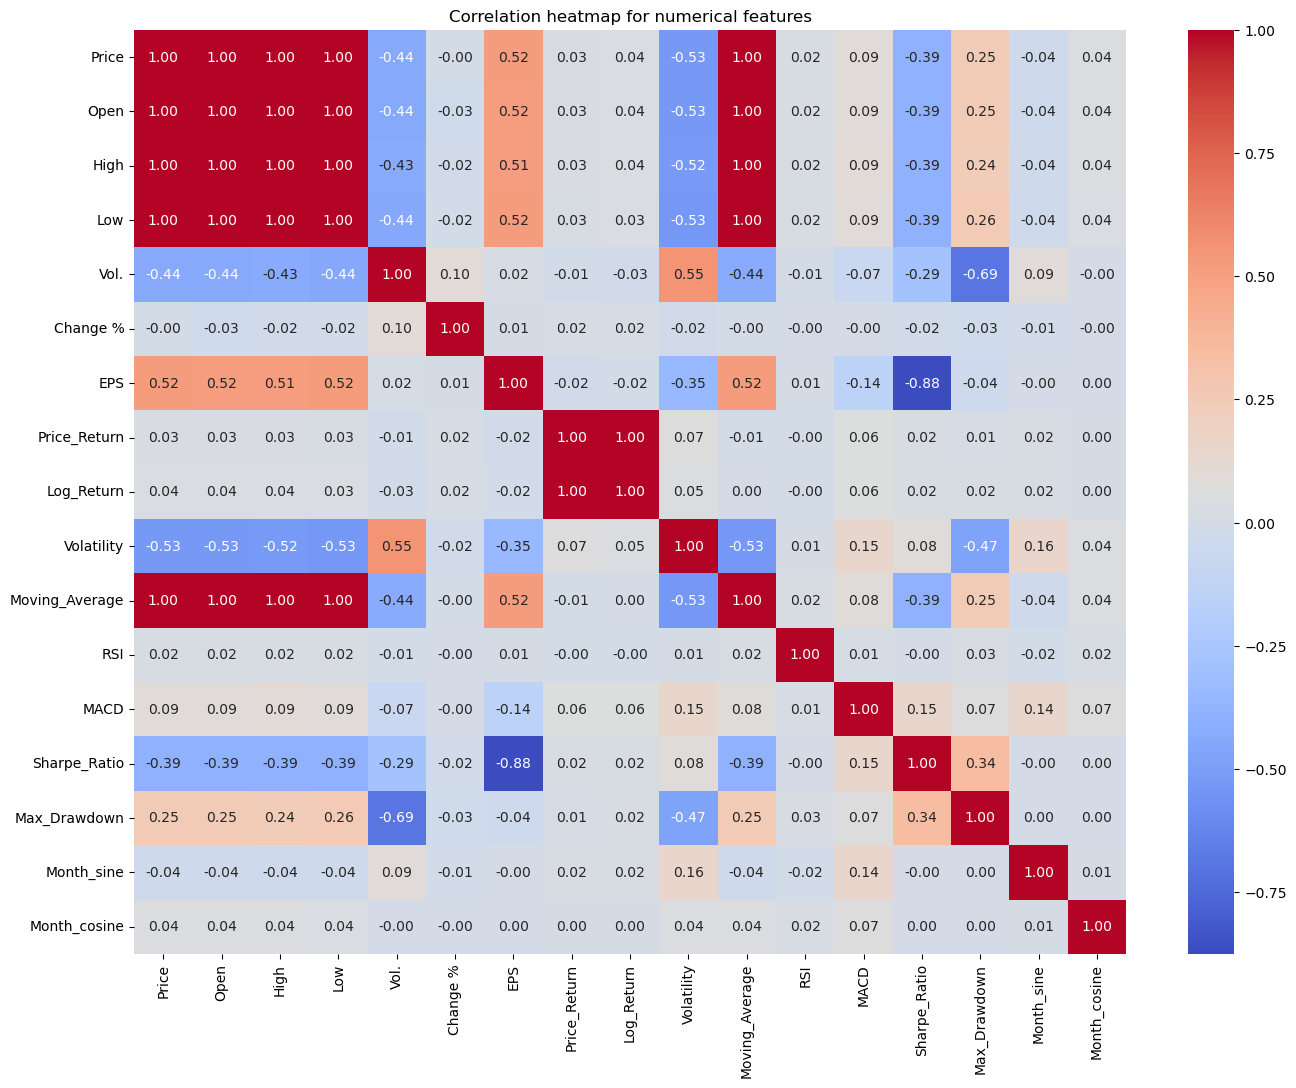

In [61]:
corr_matrix = df_float.corr()
plt.figure(figsize=(16, 12))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation heatmap for numerical features")

In [65]:
price_corr = corr_matrix['Price']
price_corr

Price             1.000000
Open              0.999341
High              0.999618
Low               0.999675
Vol.             -0.437029
Change %         -0.004958
EPS               0.516964
Price_Return      0.026936
Log_Return        0.035544
Volatility       -0.528594
Moving_Average    0.998766
RSI               0.021498
MACD              0.090050
Sharpe_Ratio     -0.391309
Max_Drawdown      0.251194
Month_sine       -0.036516
Month_cosine      0.041397
Name: Price, dtype: float64

In [67]:
price_corr[abs(price_corr) > 0.2]

Price             1.000000
Open              0.999341
High              0.999618
Low               0.999675
Vol.             -0.437029
EPS               0.516964
Volatility       -0.528594
Moving_Average    0.998766
Sharpe_Ratio     -0.391309
Max_Drawdown      0.251194
Name: Price, dtype: float64

### Exploratory Analysis for identify Temporal Pattern


In [30]:
# 1 convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

### 2. Extract Temporal Features

- To capture seasonal effects, trends and periodic behaviours
- considered feature engineering under ML Foundations


In [31]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_Of_Week'] = df['Date'].dt.dayofweek # 0 = Monday, 6 = Sunday
df['Is_Weekend'] = (df['Day_Of_Week'] >= 5).astype(int) # 0 = not weekend, 1 = weekend
df['Quarter'] = df['Date'].dt.quarter

In [32]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Year,EPS,Ticker,...,Moving_Average,RSI,MACD,Sharpe_Ratio,Max_Drawdown,Month,Day,Day_Of_Week,Is_Weekend,Quarter
0,2024-11-01,141.86,144.44,144.54,141.32,39030000.0,-0.0153,2024,0.7,AMD,...,143.830,411.212815,0.728616,-0.010539,-0.000235,11,1,4,0,4
1,2024-10-31,144.07,147.80,148.68,143.33,44390000.0,-0.0305,2024,0.7,AMD,...,142.680,310.200927,0.792438,-0.010539,-0.000235,10,31,3,0,4
2,2024-10-30,148.60,153.01,153.12,148.10,87700000.0,-0.1062,2024,0.7,AMD,...,143.380,247.665581,1.194777,-0.010539,-0.000235,10,30,2,0,4
3,2024-10-29,166.25,161.10,167.51,158.94,71900000.0,0.0396,2024,0.7,AMD,...,148.298,148.096633,2.904362,-0.010539,-0.000235,10,29,1,0,4
4,2024-10-28,159.92,158.50,160.28,157.04,36010000.0,0.0236,2024,0.7,AMD,...,152.140,161.710631,3.705724,-0.010539,-0.000235,10,28,0,0,4


### 3. Exploratory Data Analysis on Temporal Features


#### 3.1 Univariate Analysis


<Axes: title={'center': 'Frequency of records by Month'}, xlabel='Month'>

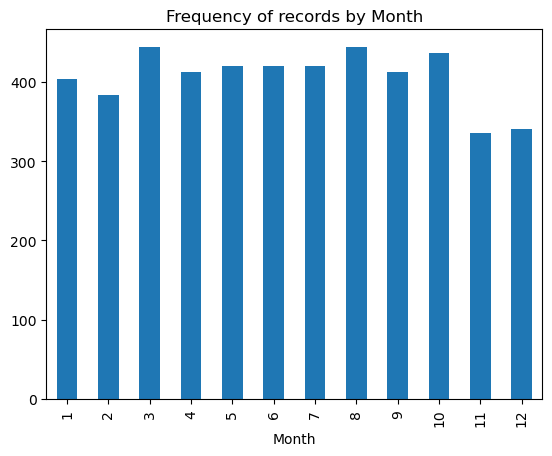

In [33]:
df['Month'].value_counts().sort_index().plot(kind='bar', title="Frequency of records by Month")

#### Understandinging of Month records

- November and December tends to have more holidays (Thanks Giving, Christmas, New Year)
- Elections are typically held in November
- March and August typically does not have holidays affecting, hence more active trading days


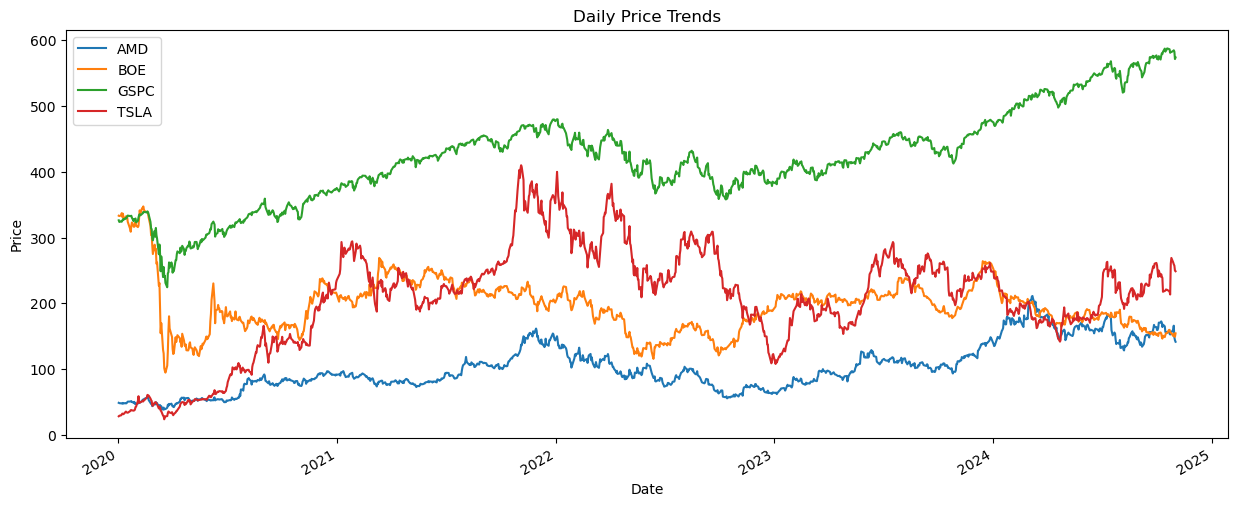

In [34]:
grouped_df = df.groupby(['Date', 'Ticker'])['Price'].mean().reset_index()
pivot_table = grouped_df.pivot(index='Date', columns='Ticker', values='Price')

pivot_table.plot(title='Daily Price Trends', figsize=(15,6))
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(['AMD', 'BOE', 'GSPC', 'TSLA'])
plt.show()

#### Time Series Analysis of Price trends

- GSPC (SNP500) increases slowly but steadily, saw a dip between 2022 and 2023 due to Feds increasing the interest rates
- similar trends occurred for other stocks


### 3.2 Bi-variate Analysis


<Axes: xlabel='Month', ylabel='Price'>

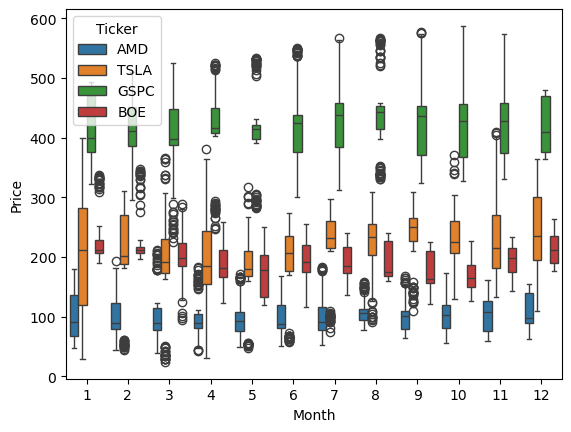

In [35]:
sb.boxplot(x='Month', y='Price', hue='Ticker', data=df)

#### Cyclic Behaviour Analysis using Fourier Analysis


Text(0, 0.5, 'Price')

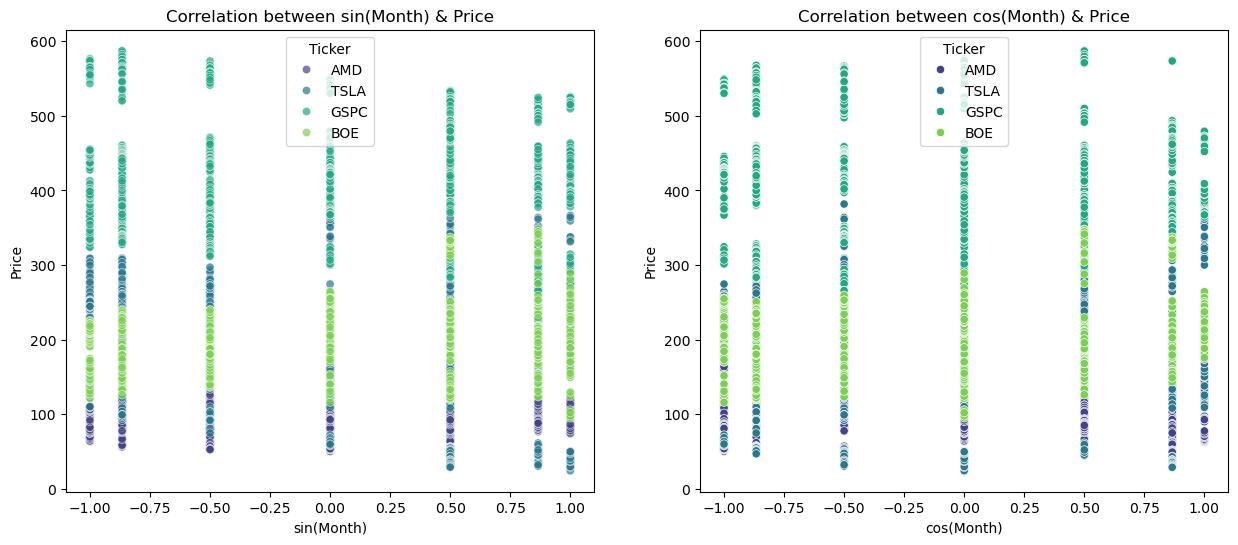

In [36]:
df['Month_sine'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cosine'] = np.cos(2 * np.pi * df['Month'] / 12)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sb.scatterplot(x='Month_sine', y='Price', hue='Ticker', data=df, palette='viridis', alpha=0.7)
plt.title('Correlation between sin(Month) & Price')
plt.xlabel('sin(Month)')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
sb.scatterplot(x='Month_cosine', y='Price', hue='Ticker', data=df, palette='viridis', alpha=1.)
plt.title('Correlation between cos(Month) & Price')
plt.xlabel('cos(Month)')
plt.ylabel('Price')

#### Conclusion for bi-variate analysis of Months vs Price - No visible correlation between month and stock price


In [37]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Year',
       'EPS', 'Ticker', 'Price_Return', 'Log_Return', 'Volatility',
       'Moving_Average', 'RSI', 'MACD', 'Sharpe_Ratio', 'Max_Drawdown',
       'Month', 'Day', 'Day_Of_Week', 'Is_Weekend', 'Quarter', 'Month_sine',
       'Month_cosine'],
      dtype='object')

In [38]:
df.dtypes

Date              datetime64[ns]
Price                    float64
Open                     float64
High                     float64
Low                      float64
Vol.                     float64
Change %                 float64
Year                       int32
EPS                      float64
Ticker                    object
Price_Return             float64
Log_Return               float64
Volatility               float64
Moving_Average           float64
RSI                      float64
MACD                     float64
Sharpe_Ratio             float64
Max_Drawdown             float64
Month                      int32
Day                        int32
Day_Of_Week                int32
Is_Weekend                 int64
Quarter                    int32
Month_sine               float64
Month_cosine             float64
dtype: object

### Exploratory Data Analysis between


## 4 Volatility & Risk Analysis


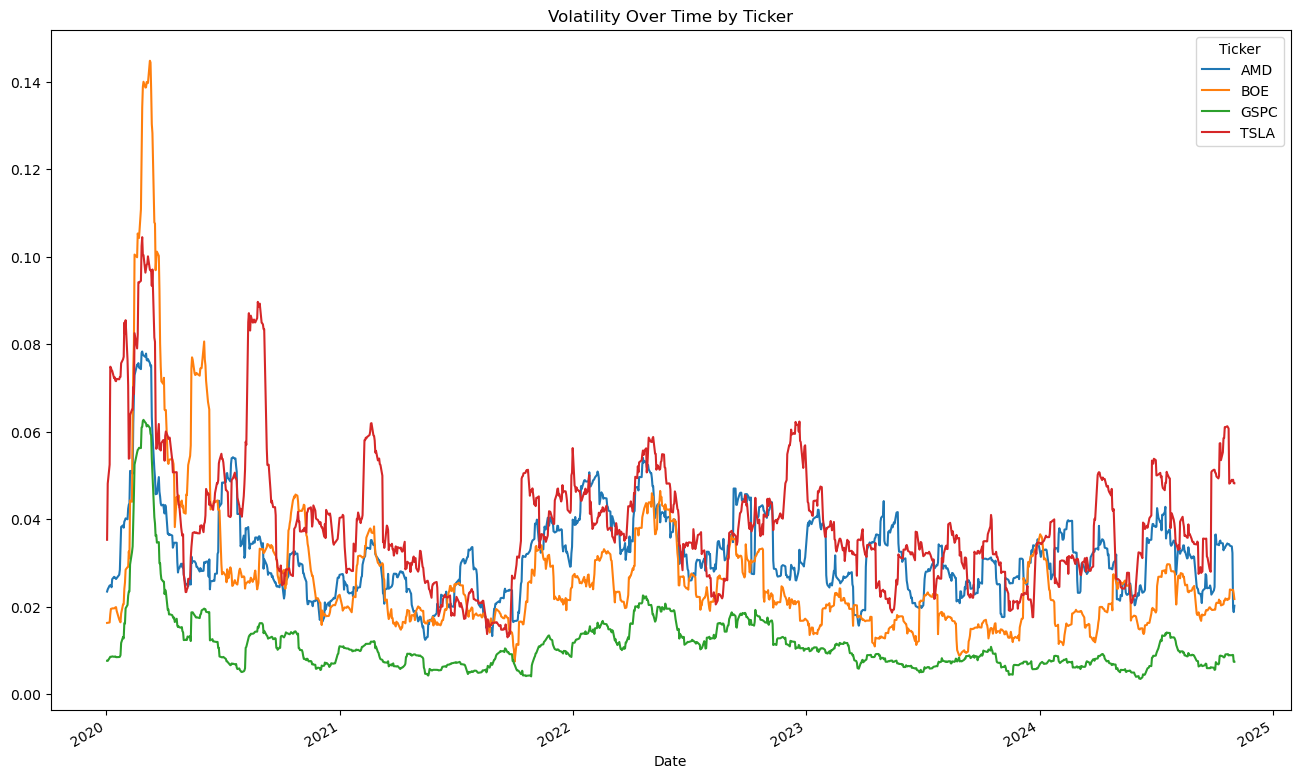

In [78]:
# Step 1: Group by 'Ticker' and plot 'Volatility' for each ticker
plt.figure(figsize=(16,10))
for ticker, group in df.groupby('Ticker'):
    # Step 2: Set 'Date' as index for each group
    group.set_index('Date', inplace=True)
    
    # Step 3: Plot 'Volatility' over time for the current ticker
    group['Volatility'].plot(label=ticker)

# Step 4: Add title and legend to distinguish the tickers
plt.title('Volatility Over Time by Ticker')
plt.legend(title='Ticker')
plt.show()

In [84]:
df['Price_zscore'] = zscore(df['Price'])

In [85]:
for col in float_columns:
    print(col.capitalize())

Price
Open
High
Low
Vol.
Change %
Eps
Price_return
Log_return
Volatility
Moving_average
Rsi
Macd
Sharpe_ratio
Max_drawdown
Month_sine
Month_cosine


## 5 Outlier analysis


In [86]:
for col in float_columns:
    df[f"{col.capitalize()}_zscore"] = zscore(df[col])

/opt/anaconda3/envs/FNN_Stock_Prediction/lib/python3.11/site-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [87]:
df.head(1)

,Date,Price,Open,High,Low,Vol.,Change %,Year,EPS,Ticker,...,Price_return_zscore,Log_return_zscore,Volatility_zscore,Moving_average_zscore,Rsi_zscore,Macd_zscore,Sharpe_ratio_zscore,Max_drawdown_zscore,Month_sine_zscore,Month_cosine_zscore
0,2024-11-01,141.86,144.44,144.54,141.32,39030000.0,-0.0153,2024,0.7,AMD,...,0.256084,0.272537,-0.424656,-0.676093,NaN,0.202634,-0.041002,0.34126,-0.694954,1.299575


In [89]:
zscore_columns = ['Price_return_zscore', 'Log_return_zscore', 'Volatility_zscore', 
                  'Moving_average_zscore', 'Rsi_zscore', 'Macd_zscore', 
                  'Sharpe_ratio_zscore', 'Max_drawdown_zscore', 
                  'Month_sine_zscore', 'Month_cosine_zscore']

# Loop through each column and identify outliers (values > |3|)
outliers = {}

for col in zscore_columns:
    # Identify outliers where the absolute value of the z-score is greater than 3
    outliers[col] = df[df[col].abs() > 2]

# Display outliers
outliers

{'Price_return_zscore':            Date   Price    Open    High     Low         Vol.  Change %  Year  \
 3    2024-10-29  166.25  161.10  167.51  158.94   71900000.0    0.0396  2024   
 44   2024-08-30  148.56  147.52  148.99  145.25   31170000.0    0.0211  2024   
 66   2024-07-31  144.48  150.73  153.60  140.03  114310000.0    0.0436  2024   
 72   2024-07-23  154.00  154.95  157.05  153.80   31950000.0   -0.0120  2024   
 77   2024-07-16  177.55  179.69  179.75  174.53   40630000.0   -0.0127  2024   
 ...         ...     ...     ...     ...     ...          ...       ...   ...   
 4823 2020-03-12  154.84  160.53  189.85  154.81   31730000.0   -0.1811  2020   
 4824 2020-03-11  189.08  222.99  226.99  187.00   28570000.0   -0.1815  2020   
 4825 2020-03-10  231.01  237.00  237.83  215.00   13060000.0    0.0169  2020   
 4827 2020-03-06  262.33  253.70  264.29  249.80   12860000.0    0.0075  2020   
 4829 2020-03-04  283.12  284.55  285.91  277.01    6990000.0    0.0089  2020   
 
   